In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import itertools
from sklearn.externals import joblib
%matplotlib inline

/home/ec2-user/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
shift = 200
yTestDf = pd.DataFrame()
yTrainDf = pd.DataFrame()

### use y_train_truth of xgb runs

In [3]:
yTrainTrue = joblib.load('../output/xgb_combined_transformed_10folds_trian_true_y.sav')

### load the xgb results

In [4]:
# load xgb results
col_name = 'xgb_new_10folds'
yTestDf[col_name] = pd.read_csv('../output/xgb_combined_transformed_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/xgb_combined_transformed_10folds_pred_on_trian.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.6130567623


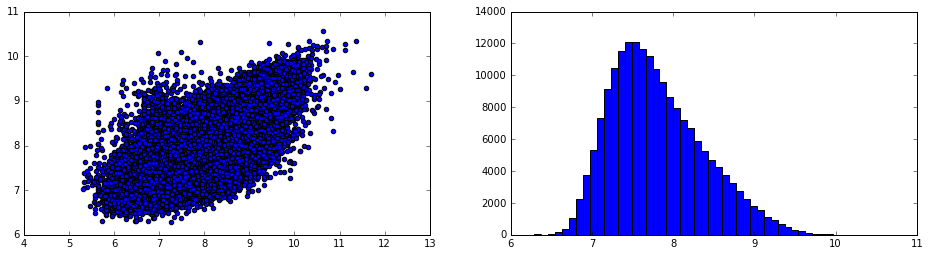

In [5]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

### keras results with raw features

In [6]:
# load keras results
col_name = 'keras_raw_5folds'
yTestDf[col_name] = pd.read_csv('../output/keras_5folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name] + shift)
index0 = pd.read_csv('./preds_oob.csv')
indexed = index0.sort_values(by='id')
yTrainDf[col_name] = np.log(indexed['loss'].values+shift)

0.591653069928


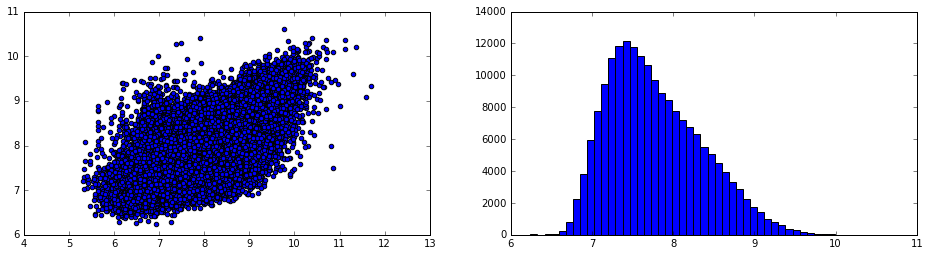

In [7]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

## load LightGBM results

In [8]:
# load xgb results
yTestDf['lgbm_raw_10folds'] = pd.read_csv('../output/lgbm_10folds.csv' , usecols = ['loss'])
yTestDf['lgbm_raw_10folds'] = np.log(yTestDf['lgbm_raw_10folds']+shift)
data = joblib.load('../output/lgbm_10folds_pred_on_train.sav')
yTrainDf['lgbm_raw_10folds'] = pd.Series(data[:,0],index = range(0,len(data)))

0.591653069928


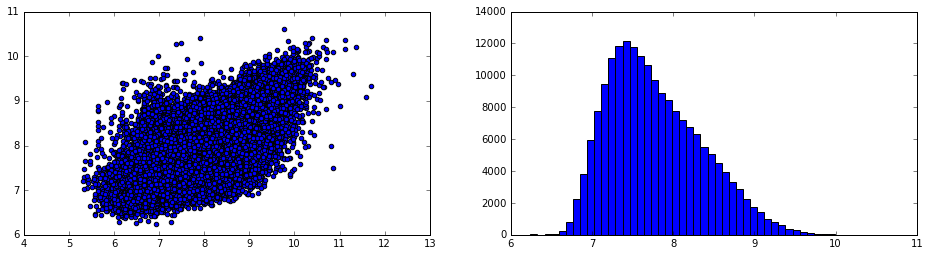

In [9]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

# load LightGBM with combined features

In [8]:
# load xgb results
col_name = 'lgbm_new_10folds'
yTestDf[col_name] = pd.read_csv('../output/lgbm_combined_transformed_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/lgbm_combined_transformed_10folds_pred_on_trian.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.597849078856


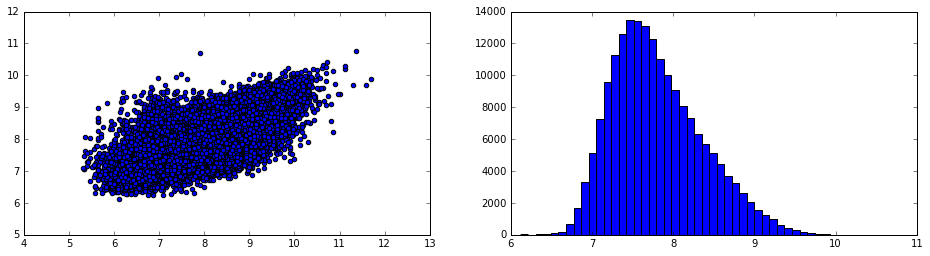

In [9]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

# Loading random forest results

In [12]:
# load xgb results
col_name = 'randomeforest_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/randomforest_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/randomforest_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.602432940956


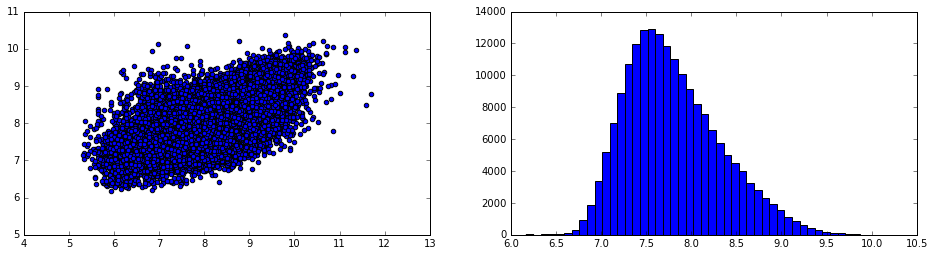

In [13]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# extra tree

In [14]:
# load xgb results
col_name = 'extratree_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/extratree_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/extratree_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.599046780405


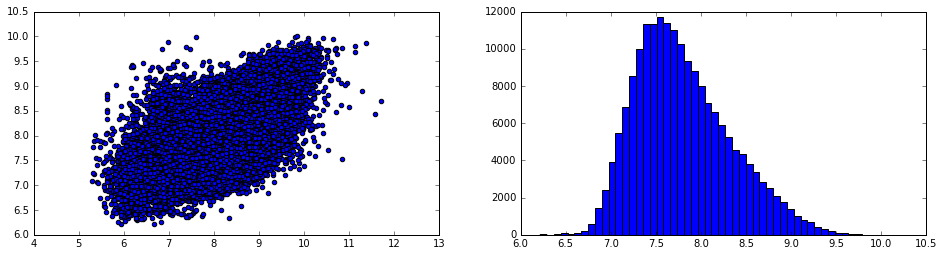

In [15]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# adaboost - tree

In [16]:
# load xgb results
col_name = 'adb_tree_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/adaboost_tree_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/adaboost_tree_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.579769036457


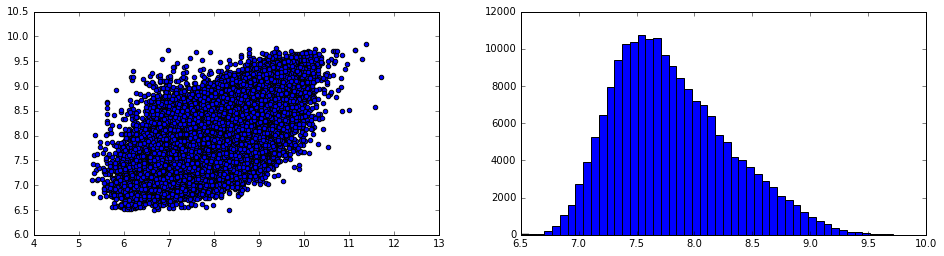

In [17]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# adaboost - linreg

In [18]:
# load xgb results
col_name = 'adb_lin_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/adaboost_lineareg_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/adaboost_lineareg_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

1.00559303526


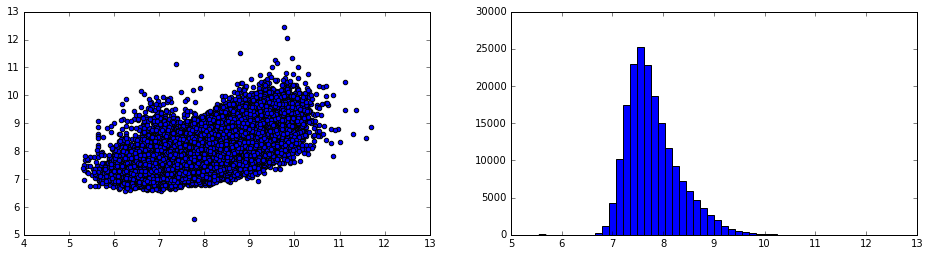

In [19]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# load mlp results

In [20]:
# load xgb results
col_name = 'mlp_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/mlp_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/mlp_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.569272521151


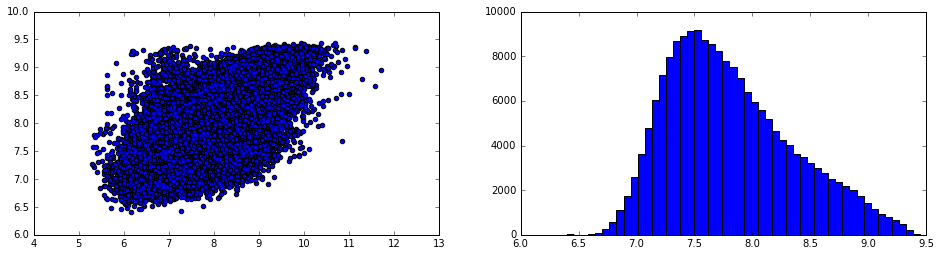

In [21]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

### check if any feature has missing values

In [10]:
yTrainDf.isnull().any()

xgb_new_10folds     False
keras_raw_5folds    False
lgbm_new_10folds    False
dtype: bool

## take a look at the data to train our 2nd-level models

In [11]:
yTrainDf.head()

,xgb_new_10folds,keras_raw_5folds,lgbm_new_10folds
0,7.663359,7.541939,7.73094
1,7.581250,7.444790,7.59283
2,8.469980,8.314032,8.40200
3,7.134099,7.089244,7.14659
4,8.101432,8.160739,8.16401


In [12]:
yTestDf.head()

,xgb_new_10folds,keras_raw_5folds,lgbm_new_10folds
0,7.480592,7.452623,7.489216
1,7.670829,7.583287,7.712615
2,9.256260,9.120258,9.174894
3,8.843674,8.860258,8.829814
4,6.892198,6.874131,6.898241


# Stacking model withe linear regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
stackedData = np.vstack([yTrainDf, yTestDf])
sp.stats.describe(stackedData)

DescribeResult(nobs=313864, minmax=(array([ 6.28989267,  6.20555955,  6.11638448]), array([ 10.56902695,  10.60462474,  10.7622    ])), mean=array([ 7.79852537,  7.77492652,  7.79872395]), variance=array([ 0.323789  ,  0.33512433,  0.30801461]), skewness=array([ 0.60642547,  0.58787795,  0.59151883]), kurtosis=array([-0.02430934, -0.13879391,  0.00045141]))

### test transformation

In [15]:
# # data transformation
# col = 0
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [16]:
# # data transformation
# col = 1
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [29]:
# # data transformation
# col = 2
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [30]:
# # data transformation
# col = 3
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [31]:
# # data transformation
# col = 4
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [32]:
# # data transformation
# col = 5
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [33]:
# # data transformation
# col = 6
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [34]:
# # data transformation
# col = 7
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

In [35]:
# # data transformation
# col = 8
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(stackedData[:,col],bins=50);
# plt.subplot(1,2,2)
# stackedData[:,col] = np.log10(stackedData[:,col]-5.5)
# plt.hist(stackedData[:,col],bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(stackedData[:,col]), sp.stats.skew(stackedData[:,col])))

### test pca

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_ydata = pca.fit_transform(stackedData)
x_ytrain = x_ydata[0:yTrainDf.shape[0],:]
x_ytest = x_ydata[yTrainDf.shape[0]:,:]
y_ytrain = yTrainTrue
print('stats of standardized megafeatures')
print sp.stats.describe(x_ydata)
print('\nshape of x_ytrain')
print x_ytrain.shape
print('\nshape of x_ytest')
print x_ytest.shape
print('\nstats of y_ytrain')
print sp.stats.describe(y_ytrain)
print('\nexplained variance ratio:')
print sum(pca.explained_variance_ratio_)

stats of standardized megafeatures
DescribeResult(nobs=313864, minmax=(array([-2.74505223, -0.77119447, -0.3748454 ]), array([ 4.64019824,  0.79339965,  0.56687529])), mean=array([ -2.94980369e-17,  -1.45668913e-15,  -1.27443886e-15]), variance=array([ 0.95768156,  0.00695305,  0.00229334]), skewness=array([ 0.59879521, -0.04569782,  0.01702378]), kurtosis=array([-0.05858531,  1.08586426,  3.03117705]))

shape of x_ytrain
(188318, 3)

shape of x_ytest
(125546, 3)

stats of y_ytrain
DescribeResult(nobs=188318, minmax=(5.3016617677984259, 11.705298420117121), mean=7.7998370088715401, variance=0.53517009720211195, skewness=0.3014089397765396, kurtosis=-0.3099884667743962)

explained variance ratio:
1.0


### standardize features for training the model

In [26]:
# ss = StandardScaler()
# x_ydata = ss.fit_transform(stackedData)
# # x_ydata = stackedData
# x_ytrain = x_ydata[0:yTrainDf.shape[0],:]
# x_ytest = x_ydata[yTrainDf.shape[0]:,:]
# y_ytrain = yTrainTrue
# print('stats of standardized megafeatures')
# print sp.stats.describe(x_ydata)
# print('\nshape of x_ytrain')
# print x_ytrain.shape
# print('\nshape of x_ytest')
# print x_ytest.shape
# print('\nstats of y_ytrain')
# print sp.stats.describe(y_ytrain)

### standardize y

In [27]:
# # data transformation
# plt.figure(figsize = (16,4))
# plt.subplot(1,2,1)
# plt.hist(y_ytrain,bins=50);
# plt.subplot(1,2,2)
# ymean = np.mean(y_ytrain)
# ystd = np.mean(y_ytrain)
# y_ytrain = (y_ytrain-ymean)/ystd
# plt.hist(y_ytrain,bins=50);
# print('(original skewness, transformed skewness): {:2.4f},{:2.4f}' 
#       .format(sp.stats.skew(y_ytrain), sp.stats.skew(y_ytrain)))

### Ridge

In [28]:
from sklearn import linear_model
lrm = linear_model.LassoCV(n_alphas=50,n_jobs=16,random_state=0)
lrm.fit(x_ytrain,y_ytrain)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=50, n_jobs=16, normalize=False, positive=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False)

In [29]:
print('the model weighing coefs:')
print lrm.coef_
print ('\nthe intercept')
print lrm.intercept_
# print ('\nresidual')
# print np.exp(lrm.residues_/len(y_pred))-shift

the model weighing coefs:
[ 0.56987757 -0.          0.        ]

the intercept
7.79953045246


### linear regression

In [30]:
# n_folds = 5
# cv_sum = 0
# y_pred = []
# seed = 0

# kf = KFold(x_ytrain.shape[0], n_folds=n_folds)
# mean_mae = 0
# for i, (train_index, test_index) in enumerate(kf):
#     print('\n Fold %d' % (i+1))
#     X_train, X_val = x_ytrain[train_index], x_ytrain[test_index]
#     y_train, y_val = y_ytrain[train_index], y_ytrain[test_index]

#     lrm = LinearRegression(n_jobs = 16)
#     lrm.fit(X_train,y_train)
#     print('coefs:')
#     print(lrm.coef_)
#     print('intercept')
#     print(lrm.intercept_)
    
#     mae = mean_absolute_error(np.exp(lrm.predict(X_val)*ystd+ymean), np.exp(y_val*ystd+ymean))
#     print('\n mae: %.6f' % mae)
#     mean_mae += mae
    
#     pred = np.exp(lrm.predict(x_ytest)*ystd+ymean) - shift
#     y_pred.append(pred)

# prediction = (np.ndarray.mean(np.vstack(y_pred).T,axis=1))
# mean_mae /= n_folds
# print('\n mean mae of %d folds: %0.6f' % (n_folds,mean_mae))

In [31]:
n_folds = 5
cv_sum = 0
y_pred = []
seed = 0

kf = KFold(x_ytrain.shape[0], n_folds=n_folds)
mean_mae = 0
for i, (train_index, test_index) in enumerate(kf):
    print('\n Fold %d' % (i+1))
    X_train, X_val = x_ytrain[train_index], x_ytrain[test_index]
    y_train, y_val = y_ytrain[train_index], y_ytrain[test_index]

    lrm = LinearRegression(n_jobs = 16)
    lrm.fit(X_train,y_train)
    print('coefs:')
    print(lrm.coef_)
    print('intercept')
    print(lrm.intercept_)
    
    mae = mean_absolute_error(np.exp(lrm.predict(X_val)), np.exp(y_val))
    print('\n mae: %.6f' % mae)
    mean_mae += mae
    
    pred = np.exp(lrm.predict(x_ytest)) - shift
    y_pred.append(pred)

prediction = (np.ndarray.mean(np.vstack(y_pred).T,axis=1))
mean_mae /= n_folds
print('\n mean mae of %d folds: %0.6f' % (n_folds,mean_mae))


 Fold 1
coefs:
[ 0.5703409  -0.06746196  0.14809978]
intercept
7.80066279375

 mae: 1123.416983

 Fold 2
coefs:
[ 0.57021584 -0.07579811  0.12730182]
intercept
7.79904817976

 mae: 1119.487645

 Fold 3
coefs:
[ 0.57068786 -0.06420658  0.15788846]
intercept
7.79857150526

 mae: 1130.954006

 Fold 4
coefs:
[ 0.57047023 -0.0595428   0.1375124 ]
intercept
7.8000568983

 mae: 1127.279765

 Fold 5
coefs:
[ 0.57068081 -0.07165452  0.13052097]
intercept
7.799299139

 mae: 1115.229188

 mean mae of 5 folds: 1123.273518


### predicting and save

In [133]:
submission = pd.read_csv('../input/sample_submission.csv',)
submission['loss'] = prediction
print submission.head()
submission.to_csv('../output/lin-stack-9-models-pca-6.csv', index=False, index_label='id')

   id         loss
0   4  1580.542191
1   6  1955.096450
2   9  9253.358171
3  12  6671.000708
4  15   811.687885


### 

## xgboost with linear regression

In [32]:
import xgboost as xgb
from sklearn.cross_validation import KFold
fair_constant = 0.7
def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-shift,
                                      np.exp(yhat)-shift)

In [33]:
n_folds = 10
cv_sum = 0
early_stopping = 100
fpred = []
xgb_rounds = []

d_train_full = xgb.DMatrix(x_ytrain, label=y_ytrain)
d_test = xgb.DMatrix(x_ytest)

kf = KFold(x_ytrain.shape[0], n_folds=n_folds)
pred_x_train = np.zeros((x_ytrain.shape[0],1))
for i, (train_index, test_index) in enumerate(kf):
    print('\n Fold %d' % (i+1))
    X_train, X_val = x_ytrain[train_index], x_ytrain[test_index]
    y_train, y_val = y_ytrain[train_index], y_ytrain[test_index]

    rand_state = 2016

# #     Local: 1122.465929 with pca features, 1123.+ with raw features
#     params = {
#         'seed': 0,
#         'colsample_bytree': 0.7,
#         'silent': 1,
#         'subsample': 0.7,
#         'learning_rate': 0.03,
#         'objective': 'reg:linear',
#         'max_depth': 6,
#         'min_child_weight': 100,
#         'booster': 'gbtree'}
#     Local: 1122.376093 with pca features
    params = {
            'seed': 0,
            'colsample_bytree': 0.7,
            'silent': 1,
            'subsample': 0.7,
            'learning_rate': 0.03,
            'objective': 'reg:linear',
            'max_depth': 6,
            'min_child_weight': 100,
            'gamma': 1,
            'booster': 'gbtree'}
# #     Local: 
#     params = {
#             'seed': 0,
#             'colsample_bytree': 1,
#             'silent': 1,
#             'subsample': 0.6,
#             'learning_rate': 0.03,
#             'objective': 'reg:linear',
#             'max_depth': 6,
#             'min_child_weight': 100,
#             'gamma': 1,
#             'booster': 'gbtree'}
    d_train = xgb.DMatrix(X_train, label=y_train)
    d_valid = xgb.DMatrix(X_val, label=y_val)
    watchlist = [(d_train, 'train'), (d_valid, 'eval')]

    clf = xgb.train(params,
                    d_train,
                    100000,
                    watchlist,
                    early_stopping_rounds=50,
                    obj=fair_obj,
                    feval=xg_eval_mae,
                    verbose_eval=False)

    xgb_rounds.append(clf.best_iteration)
    scores_val = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
    pred_x_train[test_index,0] = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
    cv_score = mean_absolute_error(np.exp(y_val), np.exp(scores_val))
    print('eval-MAE: %.6f' % cv_score)
    y_pred = np.exp(clf.predict(d_test, ntree_limit=clf.best_ntree_limit)) - shift

    if i > 0:
        fpred = pred + y_pred
    else:
        fpred = y_pred
    pred = fpred
    cv_sum = cv_sum + cv_score

mpred = pred / n_folds
score = cv_sum / n_folds
print('Average eval-MAE: %.6f' % score)
n_rounds = int(np.mean(xgb_rounds))


 Fold 1
eval-MAE: 1129.364730

 Fold 2
eval-MAE: 1114.950924

 Fold 3
eval-MAE: 1126.953350

 Fold 4
eval-MAE: 1111.352774

 Fold 5
eval-MAE: 1133.866160

 Fold 6
eval-MAE: 1127.396175

 Fold 7
eval-MAE: 1129.354285

 Fold 8
eval-MAE: 1125.610561

 Fold 9
eval-MAE: 1113.397305

 Fold 10
eval-MAE: 1116.098197
Average eval-MAE: 1122.834446


In [50]:
ids = pd.read_csv('../input/test.csv')['id']
print("Writing results")
result = pd.DataFrame(mpred, columns=['loss'])
result["id"] = ids
result = result.set_index("id")
print("%d-fold average prediction:" % n_folds)

score = str(round((cv_sum / n_folds), 6))
sub_file = '../output/xgb-stacked-9-models-10folds.csv'
print("Writing submission: %s" % sub_file)
result.to_csv(sub_file, index=True, index_label='id')

Writing results
10-fold average prediction:
Writing submission: ../output/xgb-stacked-9-models-10folds.csv


# MCMC for weights optimization

In [57]:
# x_ydata = np.exp(stackedData[:,0:2])-shift
x_ydata = np.exp(stackedData)-shift
x_ytrain = x_ydata[0:yTrainDf.shape[0],:]
x_ytest = x_ydata[yTrainDf.shape[0]:,:]
y_ytrain_true = np.exp(yTrainTrue)-shift
print x_ytrain.shape

num = x_ytrain.shape[1]
#intialize weights
weight = np.array([1.0/num,]*num)

# This is to define variables to be used later
y_ytrain_new=0
y_ytrain_old=0
counter = 0
n=int(3e3) ###MCMC steps
result={}

for i in range(0,num):
    y_ytrain_new += x_ytrain[:,i]*weight[i]
    print ('model:',str(i),',MAE=',mean_absolute_error(y_ytrain_true, x_ytrain[:,i]))
print ('combined all models ,MAE=', mean_absolute_error(y_ytrain_true,y_ytrain_new))
y_ytrain_old = y_ytrain_new

(188318, 3)
('model:', '0', ',MAE=', 1130.8393698334392)
('model:', '1', ',MAE=', 1132.8419399868478)
('model:', '2', ',MAE=', 1132.8640974701088)
('combined all models ,MAE=', 1122.0945614197806)


In [58]:
num = x_ytrain.shape[1]

n_folds  = 10
kf = KFold(x_ytrain.shape[0], n_folds=n_folds)
pred_y_test = np.zeros((x_ytest.shape[0]))
pred_y_train = np.zeros((x_ytrain.shape[0],1))

seed = 0
for i, (train_index, test_index) in enumerate(kf):
    print('\n Fold %d' % (i + 1))
    x_train_k, x_val_k = x_ytrain[train_index,:], x_ytrain[test_index,:]
    print('k th x_train:{}, x_val:{}'.format(x_train_k.shape, x_val_k.shape))
    y_train_k, y_val_k = y_ytrain_true[train_index], y_ytrain_true[test_index]    
    print('k th y_train:{}, y_val:{}'.format(y_train_k.shape,y_val_k.shape))
    
    
    #intialize weights
    weight = np.array([1.0/num,]*num)

    # This is to define variables to be used later
    y_ytrain_new=0
    y_ytrain_old=0
    counter = 0
    result={}

    for i in range(0,num):
        y_ytrain_new += x_train_k[:,i]*weight[i]
        print ('model:',str(i),',MAE=',mean_absolute_error(y_train_k, x_train_k[:,i]))
    print ('combined all models ,MAE=', mean_absolute_error(y_train_k,y_ytrain_new))
    y_ytrain_old = y_ytrain_new
    #### MCMC  #### 
    ### MCMC algo for dummies 
    ### 1. Get initialize ensemble weights
    ### 2. Generate new weights 
    ### 3. if MAE is lower, accept new weights immediately , or else accept new weights with probability of np.exp(-diff/.3)
    ### 4. repeat 2-3
    for i in xrange(0,n):
#         new_weights = weight+ np.array([0.01,]*num)*np.random.normal(loc=0.0, scale=1.0, size=num)
        new_weights = weight+ np.array([0.005,]*num)*np.random.normal(loc=0.0, scale=1.0, size=num)

        new_weights[new_weights < 0.01]=0.01
        y_ytrain_new=0
        for ii in range(0,num):
            y_ytrain_new += x_train_k[:,ii]*new_weights[ii]
        diff = mean_absolute_error(y_train_k,y_ytrain_new) - mean_absolute_error(y_train_k,y_ytrain_old)

        prob = min(1,np.exp(-diff/.08))
        random_prob = np.random.rand()
        if random_prob < prob:
            weight= new_weights
            result[i] = ( mean_absolute_error(y_train_k,y_ytrain_new), mean_absolute_error(y_train_k,y_ytrain_old),
                          prob,random_prob ,weight)
            y_ytrain_old = y_ytrain_new
            counter +=1
    print (counter *1.0 / n, 'Acceptance Ratio') #keep this [0.4,0.6] for best results
    print ('best result MAE', sorted([result[i] for i in result])[0:1][0])
    
    weight=sorted([result[i] for i in result])[0][-1]

    for i in range(0,num):
        pred_y_train[test_index,0] += x_val_k[:,i]*weight[i]
#     print ('combined all models plus MCMC weights:',',MAE=', mean_absolute_error(y_ytrain_true,y_ytrain_new))

    print ('weights:', weight[:])
    ### notice the weights do not necessarily sum to 1 ###

    y_ytest_new = 0
    for i in range(0,num):
        y_ytest_new += x_ytest[:,i]*weight[i]
    pred_y_test += y_ytest_new

print '\n Final out-of-fold estimate mae: ' + str(mean_absolute_error(y_ytrain_true,pred_y_train))
pred_y_test /=n_folds


 Fold 1
k th x_train:(169486, 3), x_val:(18832, 3)
k th y_train:(169486,), y_val:(18832,)
('model:', '0', ',MAE=', 1130.0804325714946)
('model:', '1', ',MAE=', 1132.0898562288153)
('model:', '2', ',MAE=', 1131.8015235841435)
('combined all models ,MAE=', 1121.2434658909053)
(0.469, 'Acceptance Ratio')
('best result MAE', (1119.8071478108805, 1119.831990793391, 1, 0.20951566648844389, array([ 0.28631797,  0.44807729,  0.28950424])))
('weights:', array([ 0.28631797,  0.44807729,  0.28950424]))

 Fold 2
k th x_train:(169486, 3), x_val:(18832, 3)
k th y_train:(169486,), y_val:(18832,)
('model:', '0', ',MAE=', 1131.6861711567371)
('model:', '1', ',MAE=', 1134.0250286138623)
('model:', '2', ',MAE=', 1133.6552557770945)
('combined all models ,MAE=', 1123.018851755292)
(0.49, 'Acceptance Ratio')
('best result MAE', (1121.4796738066002, 1121.4862923242822, 1, 0.7618020661491266, array([ 0.30440734,  0.44122072,  0.27859711])))
('weights:', array([ 0.30440734,  0.44122072,  0.27859711]))

 Fold

In [59]:
pred_y_test

array([ 1592.68516647,  1935.65785747,  9692.97688786, ...,  2541.22131596,
        1071.48809325,  3215.10785007])

In [ ]:
# #### MCMC  #### 
# ### MCMC algo for dummies 
# ### 1. Get initialize ensemble weights
# ### 2. Generate new weights 
# ### 3. if MAE is lower, accept new weights immediately , or else accept new weights with probability of np.exp(-diff/.3)
# ### 4. repeat 2-3
# for i in xrange(0,n):
#     if i%1000 == 0:
#         print 'Iter ' + str(i)
#     new_weights = weight+ np.array([0.005,]*num)*np.random.normal(loc=0.0, scale=1.0, size=num)
#     new_weights[new_weights < 0.01]=0.01
#     y_ytrain_new=0
#     for ii in range(0,num):
#         y_ytrain_new += x_ytrain[:,ii]*new_weights[ii]
#     diff = mean_absolute_error(y_ytrain_true,y_ytrain_new) - mean_absolute_error(y_ytrain_true,y_ytrain_old)
    
#     prob = min(1,np.exp(-diff/.3))
#     random_prob = np.random.rand()
#     if random_prob < prob:
#         weight= new_weights
#         result[i] = ( mean_absolute_error(y_ytrain_true,y_ytrain_new), mean_absolute_error(y_ytrain_true,y_ytrain_old),
#                       prob,random_prob ,weight)
#         y_ytrain_old = y_ytrain_new
#         counter +=1
# print (counter *1.0 / n, 'Acceptance Ratio') #keep this [0.4,0.6] for best results
# print ('best result MAE', sorted([result[i] for i in result])[0:1][0])

In [28]:
# weight=sorted([result[i] for i in result])[0][-1]
# y_ytrain_new = 0
# for i in range(0,num):
#     y_ytrain_new += x_ytrain[:,i]*weight[i]
# print ('combined all models plus MCMC weights:',',MAE=', mean_absolute_error(y_ytrain_true,y_ytrain_new))

# print ('weights:', weight[:])
# ### notice the weights do not necessarily sum to 1 ###

# y_ytest_new = 0
# for i in range(0,num):
#     y_ytest_new += x_ytest[:,i]*weight[i]

In [60]:
submission = pd.read_csv('../input/sample_submission.csv',)
submission['loss'] = pred_y_test
print submission.head()
submission.to_csv('../output/mcmc-5folds-stack-xgb-keras-lgbmnew-models.csv', index=False, index_label='id')

   id         loss
0   4  1592.685166
1   6  1935.657857
2   9  9692.976888
3  12  6913.839793
4  15   796.781094
